In [1]:
import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank.txt",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
for col in ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']:

    data[col] = data[col].astype('category')

In [10]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [11]:
data['target_var']=data['y']

In [12]:
data.rename(columns={'y':'taken_term'}, inplace=True)

In [13]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,taken_term,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,no


In [14]:
data=data.drop('taken_term',axis=1)

In [15]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

data['target_var'] = encoder.fit_transform(data['target_var'])

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [18]:
data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
target_var    0
dtype: int64

In [19]:
data_c=data.select_dtypes(include=['category'])

In [20]:
data_c.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [21]:
data_c.head(30)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
5,management,single,tertiary,no,no,no,cellular,feb,failure
6,self-employed,married,tertiary,no,yes,no,cellular,may,other
7,technician,married,secondary,no,yes,no,cellular,may,unknown
8,entrepreneur,married,tertiary,no,yes,no,unknown,may,unknown
9,services,married,primary,no,yes,yes,cellular,apr,failure


In [22]:
categorical_Attributes = data.select_dtypes(include=['category']).columns
categorical_Attributes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [23]:
data_n=data.select_dtypes(include=['int64'])

In [24]:
numerical_Attributes = data.select_dtypes(include=['int64']).columns
numerical_Attributes

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [25]:
num_attr=pd.DataFrame(data_n)

In [26]:
num_attr

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [27]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_")
print (data.columns, data.shape)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'target_var', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object') (4521, 52)


In [28]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,target_var,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
pd.value_counts(data['target_var'].values)

0    4000
1     521
dtype: int64

In [30]:
data['target_var'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: target_var, dtype: float64

In [31]:
#dl=pd.concat([data,num_attr])

In [32]:
#dl

In [31]:
data

,age,balance,day,duration,campaign,pdays,previous,target_var,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [32]:
y=data['target_var']

X=data.drop('target_var',axis=1)
#dataframe


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)

In [33]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    2992
1     398
Name: target_var, dtype: int64
0    1008
1     123
Name: target_var, dtype: int64


In [34]:
from sklearn.feature_selection import RFE

DT=tree.DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=20,verbose=21)

rfe_DT.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

0                  age
1              balance
2             campaign
3     contact_cellular
4      contact_unknown
5                  day
6             duration
7      job_blue-collar
8       job_technician
9      marital_married
10           month_apr
11           month_aug
12           month_jun
13           month_mar
14           month_may
15           month_nov
16           month_oct
17               pdays
18    poutcome_success
19            previous
Name: features, dtype: object

In [35]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [36]:
X_test.shape,X_train.shape

((1131, 20), (3390, 20))

In [37]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
clf

DecisionTreeClassifier()

In [39]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [40]:
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
test_pred

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

[[2992    0]
 [   0  398]]


In [43]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[932  76]
 [ 62  61]]


In [44]:
confusion_matrix_train[0,0]

2992

In [45]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [46]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9246031746031746
Test TPR:  0.4959349593495935
Test Accuracy:  0.8779840848806366


In [47]:
clf

DecisionTreeClassifier()

In [48]:
clf.feature_importances_

array([0.08423617, 0.13510509, 0.04347708, 0.00989112, 0.01742031,
       0.0915608 , 0.30655543, 0.00717807, 0.02542952, 0.015307  ,
       0.0103136 , 0.01342972, 0.02134247, 0.01100886, 0.01049163,
       0.00940258, 0.02606395, 0.05399182, 0.08539169, 0.02240309])

In [60]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=20,verbose=21)

rfe_RF.fit(X_train,y_train)
names1=X_train.columns.tolist()
b1=rfe_RF.ranking_


a1=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b1,names1))),columns=['rank','features'])


RFE_selected1=a1['features'][a1['rank']==1]

RFE_selected1


0                  age
1              balance
2             campaign
3     contact_cellular
4      contact_unknown
5                  day
6             duration
7      job_blue-collar
8       job_technician
9      marital_married
10           month_apr
11           month_aug
12           month_jun
13           month_mar
14           month_may
15           month_nov
16           month_oct
17               pdays
18    poutcome_success
19            previous
Name: features, dtype: object

In [51]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [52]:
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
train_pred1 = clf1.predict(X_train)
test_pred1 = clf1.predict(X_test)

In [54]:
confusion_matrix_train = confusion_matrix(y_train, train_pred1)

print(confusion_matrix_train)

[[2992    0]
 [   0  398]]


In [55]:
confusion_matrix_test = confusion_matrix(y_test, test_pred1)
print(confusion_matrix_test)

[[986  22]
 [ 72  51]]


In [56]:
Accuracy_Train1=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train1= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train1= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train1)
print("Train TPR: ",TPR_Train1)
print("Train Accuracy: ",Accuracy_Train1)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [57]:
Accuracy_Test1=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test1= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test1= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test1)
print("Test TPR: ",TPR_Test1)
print("Test Accuracy: ",Accuracy_Test1)

Test TNR:  0.9781746031746031
Test TPR:  0.4146341463414634
Test Accuracy:  0.9168877099911583


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [90, 180,270],
              "max_depth" : [3,5,7],
              "max_features" : [0.4,0.5,0.6]
             }

RF_model=RandomForestClassifier() 
clf2 = GridSearchCV(RF_model, param_grid, cv=3)
clf2.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.4, 0.5, 0.6],
                         'n_estimators': [90, 180, 270]})

In [59]:
clf2.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.5, n_estimators=180)

In [61]:
train_pred2 = clf2.predict(X_train)
test_pred2 = clf2.predict(X_test)

In [62]:
confusion_matrix_train = confusion_matrix(y_train, train_pred2)

print(confusion_matrix_train)



confusion_matrix_test = confusion_matrix(y_test, test_pred2)
print(confusion_matrix_test)

Accuracy_Train2=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train2= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train2= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train2)
print("Train TPR: ",TPR_Train2)
print("Train Accuracy: ",Accuracy_Train2)


Accuracy_Test2=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test2= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test2= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test2)
print("Test TPR: ",TPR_Test2)
print("Test Accuracy: ",Accuracy_Test2)

[[2983    9]
 [ 198  200]]
[[984  24]
 [ 74  49]]
Train TNR:  0.9969919786096256
Train TPR:  0.5025125628140703
Train Accuracy:  0.9389380530973451
Test TNR:  0.9761904761904762
Test TPR:  0.3983739837398374
Test Accuracy:  0.9133510167992926


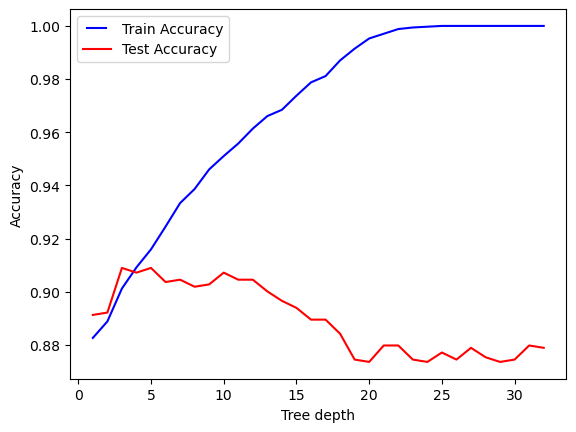

In [63]:
max_depths = np.linspace(1,32,32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

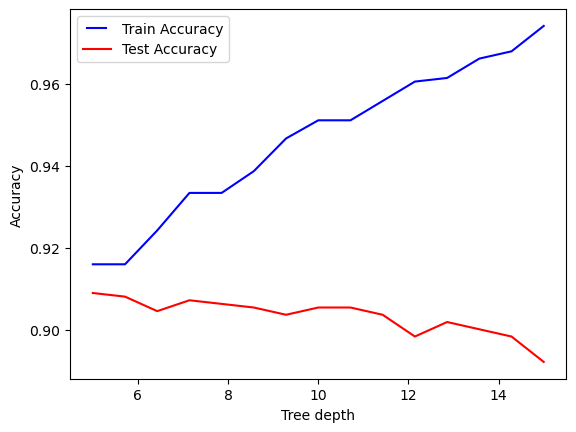

In [64]:
max_depths = np.linspace(5,15,15, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

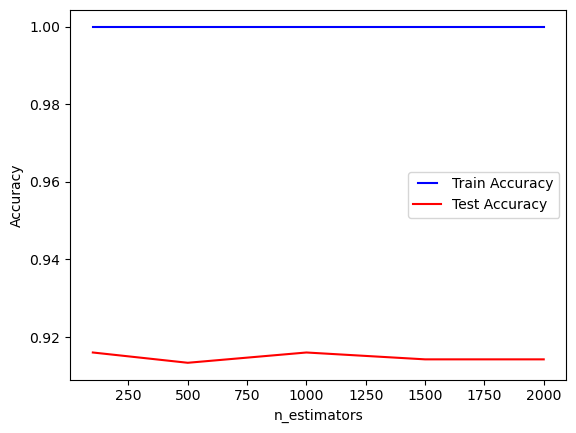

In [65]:
n_estimators = [100,500,1000,1500,2000]

train_results = []
test_results = []

for i in n_estimators:
    RF=RandomForestClassifier(n_estimators=i)
    RF.fit(X_train,y_train)
    train_pred = RF.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = RF.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

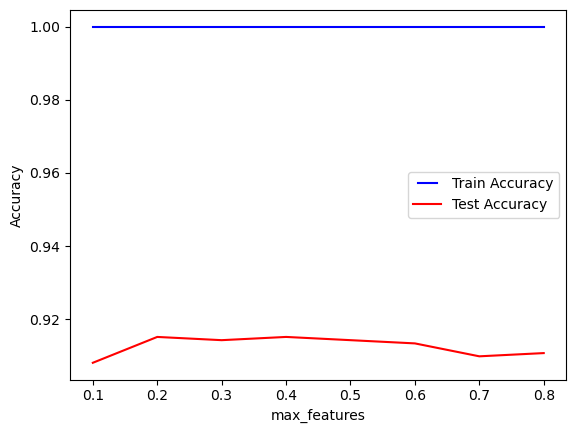

In [66]:
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]


train_results = []
test_results = []

for i in max_features:
    RF=RandomForestClassifier(max_features=i)
    RF.fit(X_train,y_train)
    train_pred = RF.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = RF.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_features, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [500,1000,2000],
              "max_depth" : [5,6,7,8,9,10,11],
              "max_features" : [0.4,0.5,0.6]
             }

RF_model=RandomForestClassifier() 
clf3 = GridSearchCV(RF_model, param_grid, cv=3)
clf3.fit(X_train,y_train)


In [ ]:
clf3.best_estimator_

In [ ]:
train_pred3 = clf3.predict(X_train)
test_pred3 = clf3.predict(X_test)

In [ ]:
confusion_matrix_train = confusion_matrix(y_train, train_pred3)

print(confusion_matrix_train)



confusion_matrix_test = confusion_matrix(y_test, test_pred3)
print(confusion_matrix_test)

Accuracy_Train3=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train3= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train3= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train3)
print("Train TPR: ",TPR_Train3)
print("Train Accuracy: ",Accuracy_Train3)


Accuracy_Test3=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test3= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test3= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test3)
print("Test TPR: ",TPR_Test3)
print("Test Accuracy: ",Accuracy_Test3)

In [ ]:
clf3.predict_proba(X_test)

In [ ]:
clf3.predict_proba(X_test)[:,1]

In [ ]:
y_train_pred_final = pd.DataFrame({'targetvar':y_train.values, 'targetvar_Prob':clf3.predict_proba(X_train)[:,1]})
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.targetvar_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

    # predicted values

predicted = test_pred3

    # confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

    # calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual1 = y_train

    # predicted values

predicted1 = train_pred3

    # confusion matrix

matrix = confusion_matrix(actual1,predicted1, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual1,predicted1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual1,predicted1,labels=[1,0])

print('Classification report : \n', C_Report)

    # calculating the metrics

sensitivity1 = round(tp/(tp+fn), 3);
specificity1 = round(tn/(tn+fp), 3);
accuracy1 = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy1 = round((sensitivity1+specificity1)/2, 3);
    
precision1 = round(tp/(tp+fp), 3);
f1Score1 = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy1*100, 2),'%')
print('Precision :', round(precision1*100, 2),'%')
print('Recall :', round(sensitivity1*100,2), '%')
print('F1 Score :', f1Score1)
print('Specificity or True Negative Rate :', round(specificity1*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy1*100, 2),'%')
    

In [ ]:
confmatrix_train_test=pd.DataFrame({'accuracy values':[accuracy1,accuracy],'recall values':[sensitivity1,sensitivity],'specificity values':[specificity1,specificity],'precision':[precision1,precision],'F1score':[f1Score1,f1Score]})


In [ ]:
confmatrix_train_test

In [ ]:
confmatrxi_train={'accuracy values':accuracy1,'recall values':sensitivity1,'specificity values':specificity1,'precision':precision1,'F1score':f1Score1}

In [ ]:
confmatrxi_test={'accuracy values':accuracy,'recall values':sensitivity,'specificity values':specificity,'precision':precision,'F1score':f1Score}

In [ ]:
confmatrxi_train

In [ ]:
confmatrxi_test